In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Detection of the dataset'encoding
import chardet

#Loan dataset
with open("database/loans.csv", 'rb') as f:
    c = f.read()
chardet.detect(c)

{'encoding': 'ISO-8859-1', 'confidence': 0.7291077209623456, 'language': ''}

In [6]:
loan = pd.read_csv('database/loans.csv', encoding ='ISO-8859-1',  sep=";")

C:\Users\pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,3,4,11,30,32,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Description dataset
with open("database/description.csv", 'rb') as f:
    c = f.read()
chardet.detect(c)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [7]:
db_desc = pd.read_csv('database/description.csv', encoding ='utf-8',  sep=";")

In [121]:
loan.columns

Index(['id', 'description.languages', 'status', 'funded_amount', 'paid_amount',
       'activity', 'sector', 'location.country_code', 'location.country',
       'location.town', 'location.geo.level', 'partner_id',
       'borrowers.first_name', 'borrowers.last_name', 'borrowers.gender',
       'borrowers.pictured', 'terms.disbursal_amount',
       'terms.disbursal_currency', 'terms.disbursal_date', 'terms.loan_amount',
       'terms.loss_liability.nonpayment',
       'terms.loss_liability.currency_exchange', 'posted_date', 'funded_date',
       'journal_totals.entries', 'paid_date', 'defaulted_date',
       'terms.local_payments.due_date', 'terms.local_payments.amount',
       'terms.scheduled_payments.due_date', 'terms.scheduled_payments.amount',
       'delinquent', 'video.youtube_id', 'basket_amount', 'amount',
       'payment_id', 'local_amount', 'processed_date', 'rounded_local_amount',
       'settlement_date', 'lat', 'lon'],
      dtype='object')

In [8]:
db_desc.columns

Index(['id', 'loan_name', 'description', 'description_translated', 'loan_use',
       'country_code', 'country_name', 'town_name', 'currency_policy',
       'currency_exchange_coverage_rate', 'partner_id', 'lender_term',
       'num_lenders_total', 'tags', 'borrower_names', 'borrower_genders',
       'borrower_pictured', 'repayment_interval', 'distribution_model'],
      dtype='object')

In [17]:
print('The shape (nb obs ; nb var) of the data set : \n\n loan :', loan.shape,'\n description : ', db_desc.shape)

The shape (nb obs ; nb var) of the data set : 

 loan : (42181, 42) 
 description :  (3182, 19)


In [24]:
db_desc.head()

,id,id_desc,description,description_translated,loan_use,country_code,country_name,town_name,currency_policy,currency_exchange_coverage_rate,partner_id,lender_term,num_lenders_total,tags,borrower_names,borrower_genders,borrower_pictured,repayment_interval,distribution_model
0,156,Marks Antonio,Through my association with the local elementa...,NaN,Purchase of tools and materials to full first ...,NI,Nicaragua,Managua,standard,NaN,5,6,1,NaN,Marks Antonio,male,true,monthly,field_partner
1,173,NaN,NaN,NaN,NaN,GZ,Gaza,NaN,standard,NaN,2,12,7,user_favorite,NaN,NaN,NaN,monthly,field_partner
2,183,Piedad Portillo,I am a baker who can do all kids of baking to ...,NaN,Money to increase inventory and happiness.,HN,Honduras,Siguatepeque,standard,NaN,5,12,3,NaN,Piedad Portillo,female,true,monthly,field_partner
3,186,Braulia,I make all different kinds of Ã\xadtems for my...,NaN,Working Capital,HN,Honduras,Siguatepeque,standard,NaN,5,6,9,NaN,Braulia,female,true,monthly,field_partner
4,200,Joan,<i>This business is a member of the Golden Cro...,NaN,Expand business to one larger room.,KE,Kenya,Ongata Rongai,standard,NaN,6,12,3,NaN,Joan,female,true,monthly,field_partner


In [25]:
loan.head()

,id,description.languages,status,funded_amount,paid_amount,activity,sector,location.country_code,location.country,location.town,...,video.youtube_id,basket_amount,amount,payment_id,local_amount,processed_date,rounded_local_amount,settlement_date,lat,lon
0,156,en,paid,500,500,Carpentry,Construction,NI,Nicaragua,Managua,...,NaN,NaN,50.0,209.0,50,20/04/2006,50,16/09/2006,12.150833,-86.268333
1,156,en,paid,500,500,Carpentry,Construction,NI,Nicaragua,Managua,...,NaN,NaN,50.0,362.0,50,05/06/2006,50,16/09/2006,12.150833,-86.268333
2,156,en,paid,500,500,Carpentry,Construction,NI,Nicaragua,Managua,...,NaN,NaN,50.0,616.0,50,31/07/2006,50,16/09/2006,12.150833,-86.268333
3,156,en,paid,500,500,Carpentry,Construction,NI,Nicaragua,Managua,...,NaN,NaN,270.0,913.0,270,17/08/2006,270,16/09/2006,12.150833,-86.268333
4,156,en,paid,500,500,Carpentry,Construction,NI,Nicaragua,Managua,...,NaN,NaN,80.0,1283.0,80,16/09/2006,80,16/09/2006,12.150833,-86.268333


In [36]:
df.shape

(13800, 60)

### Drop dupplicates observations

In [37]:
#stats desc on dupplicates obs
loan.loc[loan.id.duplicated()].count()

id                                        37177
description.languages                     26875
status                                    37177
funded_amount                             37177
paid_amount                               36671
activity                                  37177
sector                                    37177
location.country_code                     36312
location.country                          37177
location.town                             36536
location.geo.level                        37154
partner_id                                37154
borrowers.first_name                      37148
borrowers.last_name                       34912
borrowers.gender                          37107
borrowers.pictured                        37118
terms.disbursal_amount                    37105
terms.disbursal_currency                  37094
terms.disbursal_date                      37118
terms.loan_amount                         37107
terms.loss_liability.nonpayment         

In [70]:
#create variable dupplicates which gives the status of each id
duplicates = loan.id.duplicated()
duplicates.value_counts()

True     37177
False     5004
Name: id, dtype: int64

In [40]:
#keeping only non dupplictes
keep = duplicates == False

In [106]:
#Database without dupplicates values
data = loan.loc[keep,:]
data.head()

,id,description.languages,status,funded_amount,paid_amount,activity,sector,location.country_code,location.country,location.town,...,video.youtube_id,basket_amount,amount,payment_id,local_amount,processed_date,rounded_local_amount,settlement_date,lat,lon
0,156,en,paid,500,500,Carpentry,Construction,NI,Nicaragua,Managua,...,NaN,NaN,50.0,209.0,50,20/04/2006,50,16/09/2006,12.150833,-86.268333
5,173,en,defaulted,600,NaN,Construction,Construction,NaN,Gaza,Rafah,...,NaN,NaN,50.0,261.0,50,27/04/2006,50,NaN,31.284167,34.250833
10,183,en,paid,500,500,Bakery,Food,HN,Honduras,Siguatepeque,...,NaN,NaN,35.0,200.0,35,20/04/2006,35,21/11/2006,14.600000,-87.833333
19,186,en,paid,500,500,Tailoring,Services,HN,Honduras,Siguatepeque,...,NaN,NaN,35.0,189.0,35,20/04/2006,35,NaN,14.600000,-87.833333
22,200,en,paid,575,575,Beauty Salon,Services,KE,Kenya,Ongata Rongai,...,NaN,NaN,114.0,435.0,114,12/06/2006,114,02/05/2007,-0.866667,36.433333


In [107]:
data.shape

(5004, 42)

In [49]:
data.status.unique()

array(['paid', 'defaulted', 'in_repayment', '101', 'F'], dtype=object)

In [108]:
#There are some mistakes in this variables
pd.crosstab(data.status,"freq")

col_0,freq
status,
101,1
F,1
defaulted,100
in_repayment,1818
paid,3084


In [109]:
pd.crosstab(loan.status,"freq")

col_0,freq
status,
101,25
F,12
defaulted,606
in_repayment,13955
paid,27583


In [110]:
#Drop modality '101' and 'F'
data = data[data.status != '101']
data = data[data.status != 'F']
data.shape

(5002, 42)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002 entries, 0 to 42173
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      5002 non-null   object 
 1   description.languages                   3265 non-null   object 
 2   status                                  5002 non-null   object 
 3   funded_amount                           5002 non-null   object 
 4   paid_amount                             4902 non-null   object 
 5   activity                                5002 non-null   object 
 6   sector                                  5002 non-null   object 
 7   location.country_code                   4960 non-null   object 
 8   location.country                        5002 non-null   object 
 9   location.town                           4869 non-null   object 
 10  location.geo.level                      5000 non-null   obj

In [53]:
len(data['location.country'].unique())

53

In [54]:
data['location.country'].unique()

array(['Nicaragua', 'Gaza', 'Honduras', 'Kenya', 'Uganda', 'Bulgaria',
       'Cambodia', 'Moldova', 'Mexico', 'Tanzania', 'Azerbaijan', 'Ghana',
       'Samoa', 'Afghanistan', 'Bolivia', 'Ecuador', 'Viet Nam',
       'Ukraine', 'Dominican Republic',
       'The Democratic Republic of the Congo', 'Peru', 'Philippines',
       'Nigeria', 'Senegal', 'Tajikistan', 'South Sudan', 'El Salvador',
       'Togo', 'Guatemala', 'Pakistan', 'Mali', 'Lebanon', 'Paraguay',
       'Mongolia', 'Sierra Leone', 'Costa Rica', 'Benin', 'Indonesia',
       'Nepal', 'Rwanda', 'Iraq', 'Cameroon', "Cote D'Ivoire",
       'Palestine', 'Liberia', 'United States', 'Kyrgyzstan', 'Armenia',
       'Mozambique', 'Haiti', 'Bosnia and Herzegovina', 'BAM', 'partner'],
      dtype=object)

In [112]:
#display the list of variables
colum = data.columns.tolist()
for i in range(len(colum)):
    print(i," : ",colum[i])

0  :  id
1  :  description.languages
2  :  status
3  :  funded_amount
4  :  paid_amount
5  :  activity
6  :  sector
7  :  location.country_code
8  :  location.country
9  :  location.town
10  :  location.geo.level
11  :  partner_id
12  :  borrowers.first_name
13  :  borrowers.last_name
14  :  borrowers.gender
15  :  borrowers.pictured
16  :  terms.disbursal_amount
17  :  terms.disbursal_currency
18  :  terms.disbursal_date
19  :  terms.loan_amount
20  :  terms.loss_liability.nonpayment
21  :  terms.loss_liability.currency_exchange
22  :  posted_date
23  :  funded_date
24  :  journal_totals.entries
25  :  paid_date
26  :  defaulted_date
27  :  terms.local_payments.due_date
28  :  terms.local_payments.amount
29  :  terms.scheduled_payments.due_date
30  :  terms.scheduled_payments.amount
31  :  delinquent
32  :  video.youtube_id
33  :  basket_amount
34  :  amount
35  :  payment_id
36  :  local_amount
37  :  processed_date
38  :  rounded_local_amount
39  :  settlement_date
40  :  lat
41  : 

In [113]:
#list of unsual variables
unusual = ['description.languages','country_code',"borrowers.first_name",'borrowers.last_name',"borrowers.pictured","journal_totals.entries","video.youtube_id",'basket_amount']
usual = ['id','funded_amount','status','paid_amount','sector','terms.disbursal_amount','posted_date','funded_date','amount','borrowers.gender']
#list of renames variables
renam = ['location.country','location.town','location.geo.level','borrowers.gender','terms.disbursal_amount','terms.disbursal_currency','terms.disbursal_date','terms.loan_amount','terms.loss_liability.nonpayment','terms.loss_liability.currency_exchange','terms.local_payments.due_date','terms.local_payments.amount','terms.scheduled_payments.due_date','terms.scheduled_payments.amount']

In [80]:
#Renames some columns
#data = data.rename({data.columns[7] : 'country_code' , data.columns[8] : 'country', data.columns[9] : 'town', data.columns[10] : 'geo_level', data.columns[14] : 'gender', data.columns[16] : 'disbursal_amount', data.columns[19] : 'loan_amount', data.columns[20] : 'non_payment'}, axis=1)

In [134]:
data = data.filter(items=usual)
data.shape

(5002, 10)

In [135]:
data.head()

,id,funded_amount,status,paid_amount,sector,terms.disbursal_amount,posted_date,funded_date,amount,borrowers.gender
0,156,500,paid,500,Construction,500,15/02/2006,31/03/2005,50.0,M
5,173,600,defaulted,NaN,Construction,600,15/02/2006,31/03/2005,50.0,M
10,183,500,paid,500,Food,500,15/03/2006,31/03/2005,35.0,F
19,186,500,paid,500,Services,500,15/03/2006,31/03/2005,35.0,F
22,200,575,paid,575,Services,575,15/03/2006,31/03/2005,114.0,F


### Merge dataset laon with description

These dataset do not have the same size we are going to merge them

In [154]:
resul = pd.merge(data, db_desc, how = 'left', on = ['id','id'])

In [155]:
resul.columns

Index(['id', 'funded_amount', 'status', 'paid_amount', 'sector',
       'terms.disbursal_amount', 'posted_date', 'funded_date', 'amount',
       'borrowers.gender', 'id_desc', 'description', 'description_translated',
       'loan_use', 'country_code', 'country_name', 'town_name',
       'currency_policy', 'currency_exchange_coverage_rate', 'partner_id',
       'lender_term', 'num_lenders_total', 'tags', 'borrower_names',
       'borrower_genders', 'borrower_pictured', 'repayment_interval',
       'distribution_model'],
      dtype='object')

In [157]:
usual.append('repayment_interval')
usual
resul = resul.filter(items=usual)

In [160]:
resul.dropna(axis=0).status.value_counts()

paid    1540
Name: status, dtype: int64

As we can see the description dataset does not bring more information. 
That is while we are going to use only loan dataset for our prediction.

### Target variable

In [161]:
pd.crosstab(data.status,"freq")

col_0,freq
status,
defaulted,100
in_repayment,1818
paid,3084


In [162]:
conditions = [
    (data.status == 'defaulted'),
    (data.status == 'in_repayment'),
    (data.status == 'paid')
]

In [163]:
values = ['0','1','.']

In [165]:
data['target'] = np.select(conditions, values)

In [166]:
pd.crosstab(data.target,"freq")

col_0,freq
target,
.,3084
0,100
1,1818


In [167]:
data_loan = data[data.target != '.']

In [168]:
pd.crosstab(data_loan.target,"freq")

col_0,freq
target,
0,100
1,1818


In [169]:
data_loan.columns

Index(['id', 'funded_amount', 'status', 'paid_amount', 'sector',
       'terms.disbursal_amount', 'posted_date', 'funded_date', 'amount',
       'borrowers.gender', 'target'],
      dtype='object')

In [173]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1918 entries, 5 to 42173
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1918 non-null   object 
 1   funded_amount           1918 non-null   object 
 2   status                  1918 non-null   object 
 3   paid_amount             1818 non-null   object 
 4   sector                  1918 non-null   object 
 5   terms.disbursal_amount  1914 non-null   object 
 6   posted_date             1914 non-null   object 
 7   funded_date             1914 non-null   object 
 8   amount                  1914 non-null   float64
 9   borrowers.gender        1914 non-null   object 
 10  target                  1918 non-null   object 
dtypes: float64(1), object(10)
memory usage: 179.8+ KB


In [390]:
data_loan['funded_amount'] = pd.to_numeric(data_loan['funded_amount'], downcast='float')
data_loan['paid_amount'] = pd.to_numeric(data_loan['paid_amount'], downcast='float')

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [181]:
loan['terms.loss_liability.nonpayment'].value_counts()

partner       35078
lender         7000
16/02/2009       13
16/12/2008       12
Name: terms.loss_liability.nonpayment, dtype: int64

In [ ]:
terms.loss_liability.nonpayment

# Statistique Descriptive

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
from plotnine import *

In [187]:
data_loan.describe()

,funded_amount,paid_amount,amount
count,1918.000000,1818.000000,1914.000000
mean,699.270081,339.734680,76.386176
std,616.164062,359.882385,107.388272
min,50.000000,1.560000,0.180000
25%,325.000000,109.625000,27.780000
50%,550.000000,240.000000,50.300000
75%,925.000000,447.082520,84.380000
max,10000.000000,4353.129883,1323.170000


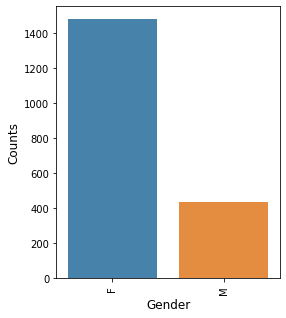

In [188]:
label_counts = data_loan['borrowers.gender'].value_counts()
plt.figure(figsize = (4,5))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('Gender', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [189]:
data_loan.groupby('target').funded_amount.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,100.0,621.500000,357.725128,75.0,300.0,587.5,900.0,1400.0
1,1818.0,703.547852,627.078064,50.0,350.0,550.0,925.0,10000.0


In [191]:
data_loan.groupby('target').paid_amount.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1818.0,339.73468,359.882385,1.56,109.625,240.0,447.082504,4353.129883


In [190]:
data_loan.groupby('target').amount.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,100.0,71.186100,47.282314,6.49,30.0,66.5,100.0000,240.00
1,1814.0,76.672839,109.748240,0.18,27.5,50.0,84.2475,1323.17


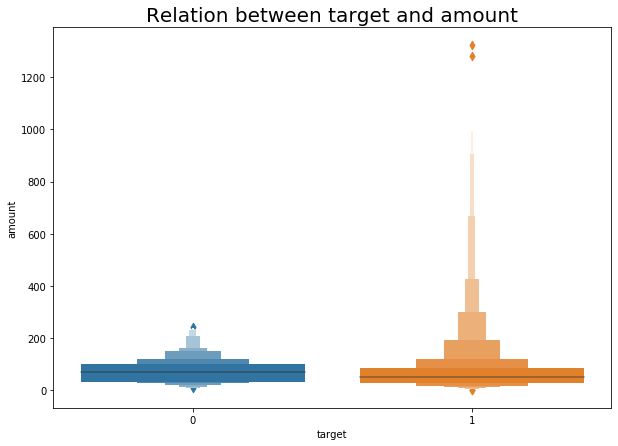

In [194]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxenplot(x = data_loan['target'], y = data_loan['amount'])
plt.title('Relation between target and amount', fontsize = 20)
plt.show()

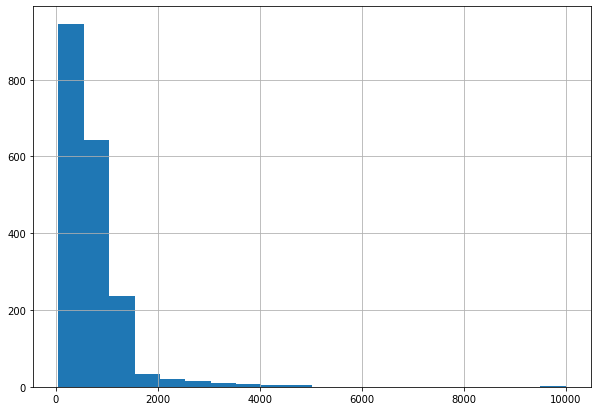

In [373]:
data_loan.funded_amount.hist(bins = 20)

In [386]:
from sklearn import preprocessing

In [391]:
scaler = preprocessing.Normalizer().fit(data_loan['funded_amount'].dropna(how = "any").head(1000))
X1 = scaler.transform(data_loan['funded_amount'].dropna(how = "any").head(1000))


ValueError: Expected 2D array, got 1D array instead:
array=[  600.   300.   700.   825.   700.   300.   600.   300.  1075.   375.
   400.   325.   800.  1000.   650.  1000.  1000.   425.   575.   400.
  1000.   275.  1000.   800.   625.   375.   325.   650.  1450.   500.
   425.  1075.   450.   525.   525.  1200.   425.   125.  3000.  1400.
   550.  1000.  1000.   325.   625.  1000.   975.   325.   600.  3925.
   250.   400.   150.   475.   500.   600.   150.   500.  1075.   275.
   150.   150.   350.  1125.   800.   275.  2325.   375.   625.   425.
   800.   800.   500.   700.  1075.   375.  1125.   625.   325.   950.
   775.   850.   525.  1200.  1050.   225.   500.   625.   725.  1050.
  1025.   700.   225.   750.   575.   925.   525.  2425.   825.  1000.
  1200.  1575.  1150.   125.   950.   500.   900.   500.  1050.   900.
  1000.   325.   200.  1850.   500.   700.   500.   875.   925.   875.
   875.   800.   900.   875.   550.   525.   525.   300.   225.   350.
   350.  2000.   800.  1000.   475.  1025.   625.   500.  1200.  1000.
   450.  1150.   650.  1000.   750.   350.   350.   225.  1000.  1750.
   500.   150.   150.  1000.  1000.   425.   350.   750.   550.   375.
   825.  1250.  1000.   925.   350.   475.   350.   775.   350.  1200.
   775.  1175.   375.   700.   450.  1125.  1000.  1000.  2700.  1000.
  1250.   725.   325.   225.   500.   250.   675.   750.   225.  1125.
  1075.   550.   425.   425.   525.   300.  1200.   975.   400.   250.
   400.   325.   125.   700.   200.   275.   275.   850.   525.   275.
   600.   225.   700.   700.   500.   500.   650.   750.   350.   350.
   500.   575.   175.  1000.   425.   425.   650.   225.  1025.   425.
   550.   325.   550.   675.   625.   700.   700.   500.   425.   950.
   400.  4175.   225.   525.   425.  1000.  1000.  1500.  1000.  1000.
  1075.   400.   525.  2000.   200.   325.   375.   375.   375.  1125.
   375.   375.   375.   375.   625.   600.  1200.  1000.   475.   275.
   775.   700.   600.   425.   850.   850.   250.  1175.   500.   850.
   550.   475.   925.  1200.   150.   375.   325.   125.   400.   500.
  1875.  1150.   550.  2000.   775.  1200.   250.  3150.  1050.   425.
   975.   800.   875.   475.   700.   350.   775.   775.  1075.  1075.
  1025.   525.   400.   250.   300.   525.   350.   650.   475.   700.
   525.  1975.   475.   475.   500.   150.   650.  1075.   550.   475.
   650.   275.   250.   675.   525.   350.   225.   675.   650.  1075.
   175.   675.   150.   500.   550.   675.   675.   675.   275.   675.
   550.   325.   800.   350.  1100.   225.   425.   275.   300.   325.
   150.   500.  3550.   125.   325.   425.   200.  1100.   600.   575.
   800.  1200.   925.   600.   375.   850.   500.  2000.  1450.   525.
   325.   350.   250.   125.   875.   275.   275.   275.  5000.   350.
   525.   300.  1200.  1000.   850.   225.   475.   250.   300.   750.
   275.   250.   700.   650.   450.   500.   200.   225.   275.   600.
   750.  1000.   625.   400.   775.   200.    75.   275.  1200.   275.
   275.   650.   375.   375.   250.  1000.  1200.  1000.   800.   250.
   650.  1025.   550.  1200.  2875.  1200.   500.  2450.  1025.   200.
   900.   250.   775.  1000.   475.  1075.   900.   525.   750.   225.
   150.   250.  1125.  1175.   225.   525.   125.   575.   900.   225.
   225.  1225.   250.   125.   950.   550.   800.   500.  3000.   225.
   150.   225.   375.   650.   500.   225.   700.  1000.   325.   400.
   900.   275.   975.  1000.   875.   275.   425.   325.   650.   450.
   500.   350.   125.   275.  1550.   250.   900.  1000.   500.   150.
   125.   125.   175.   400.   300.  1500.   175.   500.   425.  1000.
   250.   150.   450.   250.   100.   200.   700.   925.   375.    75.
   425.  2075.   650.  1025.   850.  1200.  1075.   125.   425.   200.
   700.   550.   725.   925.  1025.   225.    50.   225.   750.   650.
   600.   525.   700.   125.   800.   550.   225.   700.  3100.   425.
   750.   800.   525.   625.   575.   225.  1800.   450.  1100.  2000.
  4500.   350.   875.   125.   500.   800.   575.   400.   150.  1150.
   675.   675.   325.   300.  1000.   800.   525.  1025.   400.   350.
   325.    75.   400.   300.   125.   425.  1100.   375.  1050.   550.
   400.   800.   700.   700.   300.   250.  1150.  1150.   200.   350.
   550.   250.   425.   350.   225.   575.   525.   200.   500.   825.
   425.   300.   425.   500.   775.   650.  2000.   525.   700.   750.
   500.   425.  1500.   775.   250.  2000.   525.  2350.   650.  1125.
   400.   350.   300.   125.   700.   325.  1150.  1000.   500.   225.
   175.  1200.  1150.   925.   925.   800.   225.  1775.   300.   225.
   425.   600.   325.   600.   700.  3825.  3275.   550.   125.   125.
   125.   225.  1875.   350.   275.   275.   300.   375.   675.   700.
   925.  1600.   625.   275.  1175.   700.   700.  1000.   500.   225.
   125.   125.   125.   800.   800.   525.   350.   650.   750.  4975.
  3550.   525.   350.   950.   350.   425.  3000.   900.  1375.   375.
   425.   525.   125.   125.   325.   900.  2500.   900.   300.   950.
    75.  1075.   450.   575.  2575.   275.   725.   175.   125.   150.
   375.   800.   825.   700.   625.   325.   175.   675.   850.   700.
   800.   425.   575.   225.   500.   575.   750.  2325.   150.   525.
   350.   825.   325.   225.   125.   150.   550.   125.   175.   100.
   425.   300.   825.   150.    75.   450.   450.   325.   975.   150.
   275.   300.   825.   750.   575.   575.   900.  1025.  2875.   975.
   800.   225.   325.  1225.   700.  1200.  1125.   225.   250.   500.
   800.   900.   700.   350.   600.   525.   350.   550.   300.   425.
   125.  1150.  1500.  1025.   150.  1200.  1200.  1000.   175.   400.
   850.   675.   250.   475.   550.   700.   400.   650.   300.   125.
   625.   500.   750.   300.   300.   225.   125.   125.   625.   425.
  1175.   150.   125.   350.   175.  3000.   700.  1150.   700.   800.
   150.  1500.   425.   700.   175.   425.   700.   700.   800.   600.
  1750.  1750.   800.   700.   625.   175.   175.   900.   350.  1000.
  3325.   350.   300.  1050.   350.   700.   750.   225.   500.  1200.
   150.   625.   475.   200.   400.   125.   300.   550.   375.   250.
   500.   125.   800.   400.  1025.   100.  1050.   225.   700.  2200.
   175.   775.   350.   500.  3050.   125.   250.  1075.   550.   125.
   350.   125.   450.   900.   275.   425.   125.   125.   475.   350.
   550.   975.  1050.  1275.   225.   175.   275.   325.   675.   350.
   300.   400.   450.   650.   425.   675.   300.   250.   150.   125.
   125.   125.   550.  1075.   275.   225.  1000.   550.   975.   425.
  1775.   325.   700.  1000.   125.   125.   425.   175.   125.  1100.
   675.  1050.   350. 10000.  1075.   700.   675.   350.   275.   250.
   125.   125.   550.   175.   125.   375.   125.   225.   425.   125.
   125.   575.   450.   475.   850.   350.   350.   650.    75.   475.
   300.   875.   125.   100.   150.    75.   225.   700.   700.   375.
   450.   650.  2375.   675.   650.  2025.   775.  3150.  3425.  3275.
   300.  1200.   275.   125.  1500.   125.   275.   150.   275.  1075.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Prediction model

## re-sampling

As we saw in statistic of the target variable, we only have 100 defaulted observation,
that is while we are going to re-sample the dataset to have at list the same number of
inrepayment and default.

In [314]:
data_loan.target.unique()

array(['0', '1'], dtype=object)

In [320]:
data_rep = data_loan.loc[data_loan.target=='1']
data_def = data_loan.loc[data_loan.target=='0']
print('Base repayment : ', data_rep.shape,'\nBase default : ',data_def.shape)

Base repayment :  (1818, 11) 
Base default :  (100, 11)


In [327]:
data_rep = data_rep.sample(n=100, replace = False)

In [332]:
final = data_def.append(data_rep)

In [333]:
pd.crosstab(final.target,'y')

col_0,y
target,
0,100
1,100


# Modelisation

In [381]:
from sklearn.model_selection import train_test_split

In [337]:
df_train, df_test = train_test_split(final, test_size=0.2, random_state=10)

In [338]:
print(df_train.shape)
print(df_test.shape)

(160, 11)
(40, 11)


In [340]:
# Vérification
df_train['target'].value_counts()

1    82
0    78
Name: target, dtype: int64

In [341]:
df_test['target'].value_counts()

0    22
1    18
Name: target, dtype: int64

In [378]:
target_train = df_train['target'].values

target_set = df_test['target'].values

In [383]:
quanti = ['funded_amount','paid_amount','amount']

X_train = df_train[quanti]
y_train = df_train[quanti]

X_test = df_test[quanti]
y_tets = df_test[quanti]


In [351]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [384]:
from sklearn.svm import LinearSVC
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 5 to 9199
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      200 non-null    object 
 1   funded_amount           200 non-null    float32
 2   status                  200 non-null    object 
 3   paid_amount             100 non-null    float32
 4   sector                  200 non-null    object 
 5   terms.disbursal_amount  200 non-null    object 
 6   posted_date             200 non-null    object 
 7   funded_date             200 non-null    object 
 8   amount                  200 non-null    float64
 9   borrowers.gender        200 non-null    object 
 10  target                  200 non-null    object 
dtypes: float32(2), float64(1), object(8)
memory usage: 17.2+ KB


In [385]:
#SVM
Model2 = LinearSVC()
Model2.fit(X_train,y_train)
#predictions2 = Model2.predict(counts_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').